In [14]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
img = cv.imread('dataset/digits.png')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [12]:
img.shape

(1000, 2000, 3)

In [13]:
gray.shape

(1000, 2000)

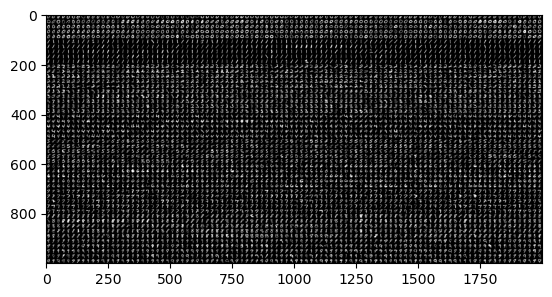

In [17]:
plt.imshow(img)

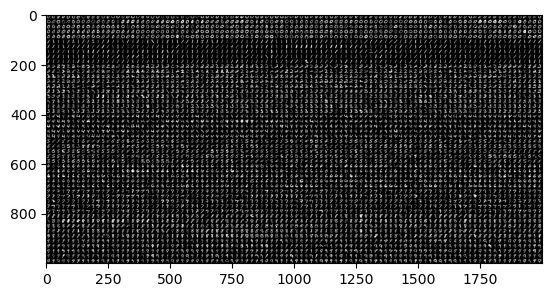

In [19]:
plt.imshow(gray, cmap="gray")

In [27]:
type(gray), type(img)

(numpy.ndarray, numpy.ndarray)

In [34]:
gray[999]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [64]:
gray.shape, img.shape

((1000, 2000), (1000, 2000, 3))

In [20]:
divisions = list(np.hsplit(i,100) for i in np.vsplit(gray,50))

In [91]:
len(divisions)

50

In [60]:
len(divisions[0])

100

In [75]:
a = divisions[0][0]
a.shape

(20, 20)

In [56]:
NP_array = np.array(divisions)

In [55]:
NP_array.shape

(50, 100, 20, 20)

In [54]:
NP_array[0][0][0][0]

0

In [41]:
train_data = NP_array[:,:50].reshape(-1,400).astype(np.float32)

In [42]:
test_data = NP_array[:,50:100].reshape(-1,400).astype(np.float32)

In [62]:
train_data.shape, test_data.shape

((2500, 400), (2500, 400))

In [77]:
k = np.arange(10)
k

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [80]:
train_labels = np.repeat(k,250)[:,np.newaxis]
train_labels.shape

(2500, 1)

In [81]:
test_labels = np.repeat(k,250)[:,np.newaxis]
test_labels.shape

(2500, 1)

In [82]:
knn = cv.ml.KNearest_create()
knn.train(train_data, cv.ml.ROW_SAMPLE, train_labels)
ret, results, neighbours ,dist = knn.findNearest(test_data, 3)
print( "result: {}\n".format(results) )
print( "neighbours: {}\n".format(neighbours) )
print( "distance: {}\n".format(dist) )
plt.show()

result: [[0.]
 [0.]
 [0.]
 ...
 [9.]
 [9.]
 [9.]]

neighbours: [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [9. 9. 9.]
 [9. 9. 7.]
 [9. 9. 9.]]

distance: [[ 361955.  598018.  606136.]
 [ 790595.  959768. 1055851.]
 [ 534520.  641045.  681043.]
 ...
 [ 632329.  646093.  712409.]
 [ 464467.  784272.  872704.]
 [1315263. 1358024. 1463505.]]



In [89]:
matched = results == test_labels
matched.shape, results.shape, results.size

((2500, 1), (2500, 1), 2500)

In [86]:
correct_op = np.count_nonzero(matched)
correct_op

2291

In [93]:
accuracy = (correct_op*100)/(results.size)
accuracy

91.64